<a href="https://colab.research.google.com/github/ManasPatil281/Assignment/blob/main/Assignement_Banao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4==4.7.1 certifi==2019.3.9 chardet==3.0.4 Click==7.0 cssselect==1.0.3 feedfinder2==0.0.4 feedparser==5.2.1 Flask==1.0.2 Flask-Cors==3.0.7 idna==2.8 itsdangerous==1.1.0 jieba3k==0.35.1 Jinja2==2.10 lxml==4.3.2 MarkupSafe==1.1.1 newspaper3k==0.2.8 nltk==3.4 oauthlib==3.0.1 Pillow==5.4.1 python-dateutil==2.8.0 PyYAML==5.1 requests==2.21.0 requests-file==1.4.3 requests-oauthlib==1.2.0 singledispatch==3.4.0.3 six==1.12.0 soupsieve==1.8 tinysegmenter==0.3 tldextract==2.2.1 tqdm==4.31.1 twython==3.7.0 urllib3==1.24.1 Werkzeug==0.15.1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import pandas as pd
import spacy
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
nlp = spacy.load("en_core_web_sm")

# Step 1: Load the CSV Files
# Define file paths for each dataset
files = {
    "politifact_fake.csv": "fake",
    "politifact_real.csv": "real",
    "gossipcop_fake.csv": "fake",
    "gossipcop_real.csv": "real"
}

In [13]:
df_list = []
for file, label in files.items():
    df = pd.read_csv(f"/content/sample_data/{file}")
    df["label"] = label
    df_list.append(df)

In [15]:
# Concatenate all dataframes
df = pd.concat(df_list, ignore_index=True)

In [16]:
# Step 2: Calculate News Popularity based on tweet count
# Split tweet_ids by tab and count
df['tweet_count'] = df['tweet_ids'].apply(lambda x: len(str(x).split('\t')))

# Step 3: Named Entity Recognition (NER) on Titles
def extract_entities(text):
    """Extract entities from the text using spaCy."""
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


In [17]:
# Apply NER and add entity information
df['entities'] = df['title'].apply(lambda x: extract_entities(x) if pd.notnull(x) else [])

# Step 4: Prepare Popularity vs. Fake/Real Correlation Analysis
# Map label to numerical values for correlation
label_mapping = {'fake': 0, 'real': 1}
df['label_numeric'] = df['label'].map(label_mapping)


In [18]:
# Calculate correlation between tweet_count (popularity) and label (fake/real)
correlation, p_value = (df['tweet_count'], df['label_numeric'])
print(f"Pearson correlation between popularity and news authenticity: {correlation:.2f} (p-value: {p_value:.4f})")


Pearson correlation between popularity and news authenticity: -0.05 (p-value: 0.0000)


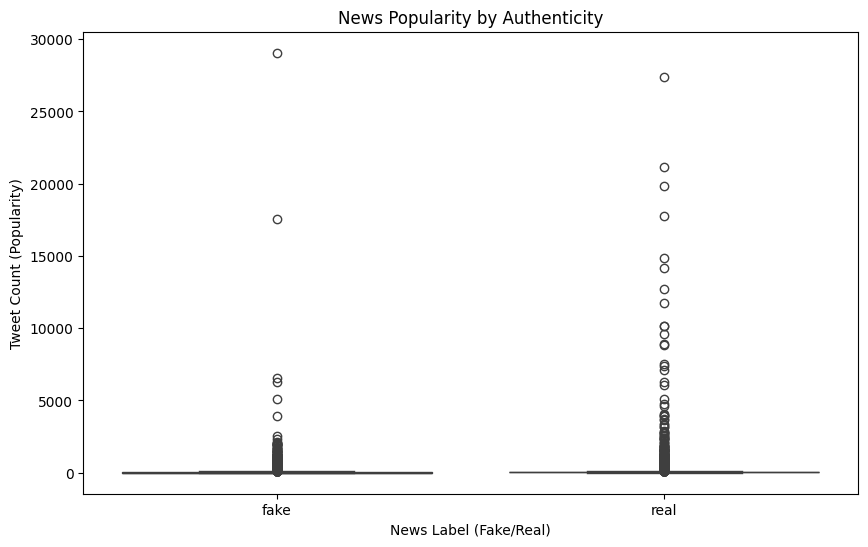

In [19]:
# Step 5: Visualization
# Plot popularity distribution by Fake/Real
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='tweet_count')
plt.title("News Popularity by Authenticity")
plt.xlabel("News Label (Fake/Real)")
plt.ylabel("Tweet Count (Popularity)")
plt.show()

In [20]:
# Visualizing Entities in Popular News
# Get top 10 most popular articles based on tweet_count
top_popular_news = df.nlargest(10, 'tweet_count')
top_entities = top_popular_news['entities'].explode()

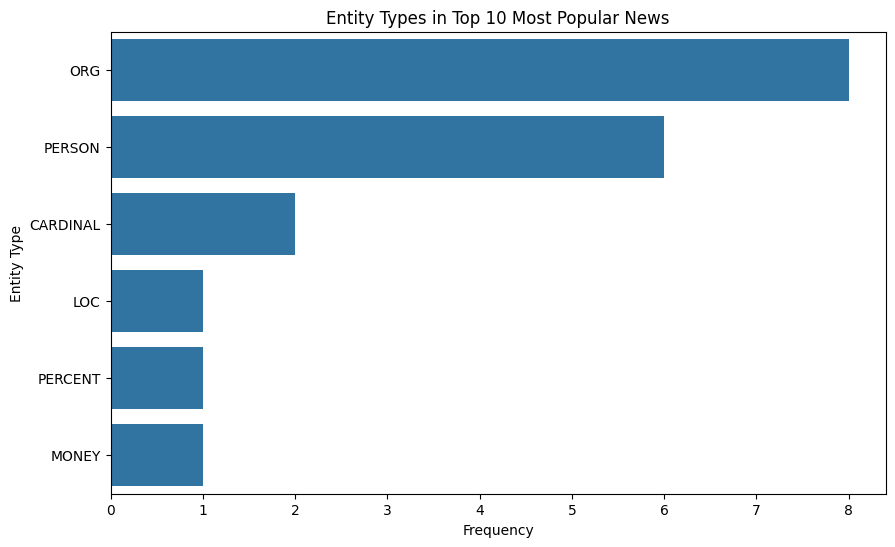

In [21]:
# Filter out invalid entries in top_entities
entity_labels = [ent[1] for ent in top_entities if isinstance(ent, tuple) and len(ent) > 1]

plt.figure(figsize=(10, 6))
sns.countplot(y=entity_labels, order=pd.Series(entity_labels).value_counts().index)
plt.title("Entity Types in Top 10 Most Popular News")
plt.xlabel("Frequency")
plt.ylabel("Entity Type")
plt.show()

plt.show()

In [ ]:
# Drop rows with missing engagement metrics if they exist
df.head()

,id,news_url,title,tweet_ids,label,tweet_count,entities,label_numeric
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,fake,163,[],0
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,fake,102,"[($400 Million, MONEY)]",0
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,fake,220,"[(Second, ORDINAL), (Roy Moore, PERSON), (Mich...",0
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,fake,22,"[(Oscar Pistorius, PERSON)]",0
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,fake,550,"[(Trump Votes For Death Penalty For Being Gay,...",0
